In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/content/breast-cancer.csv")

In [3]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data.shape

(569, 32)

In [8]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

In [10]:
corr=data.corr()

In [11]:
corr

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


<Axes: >

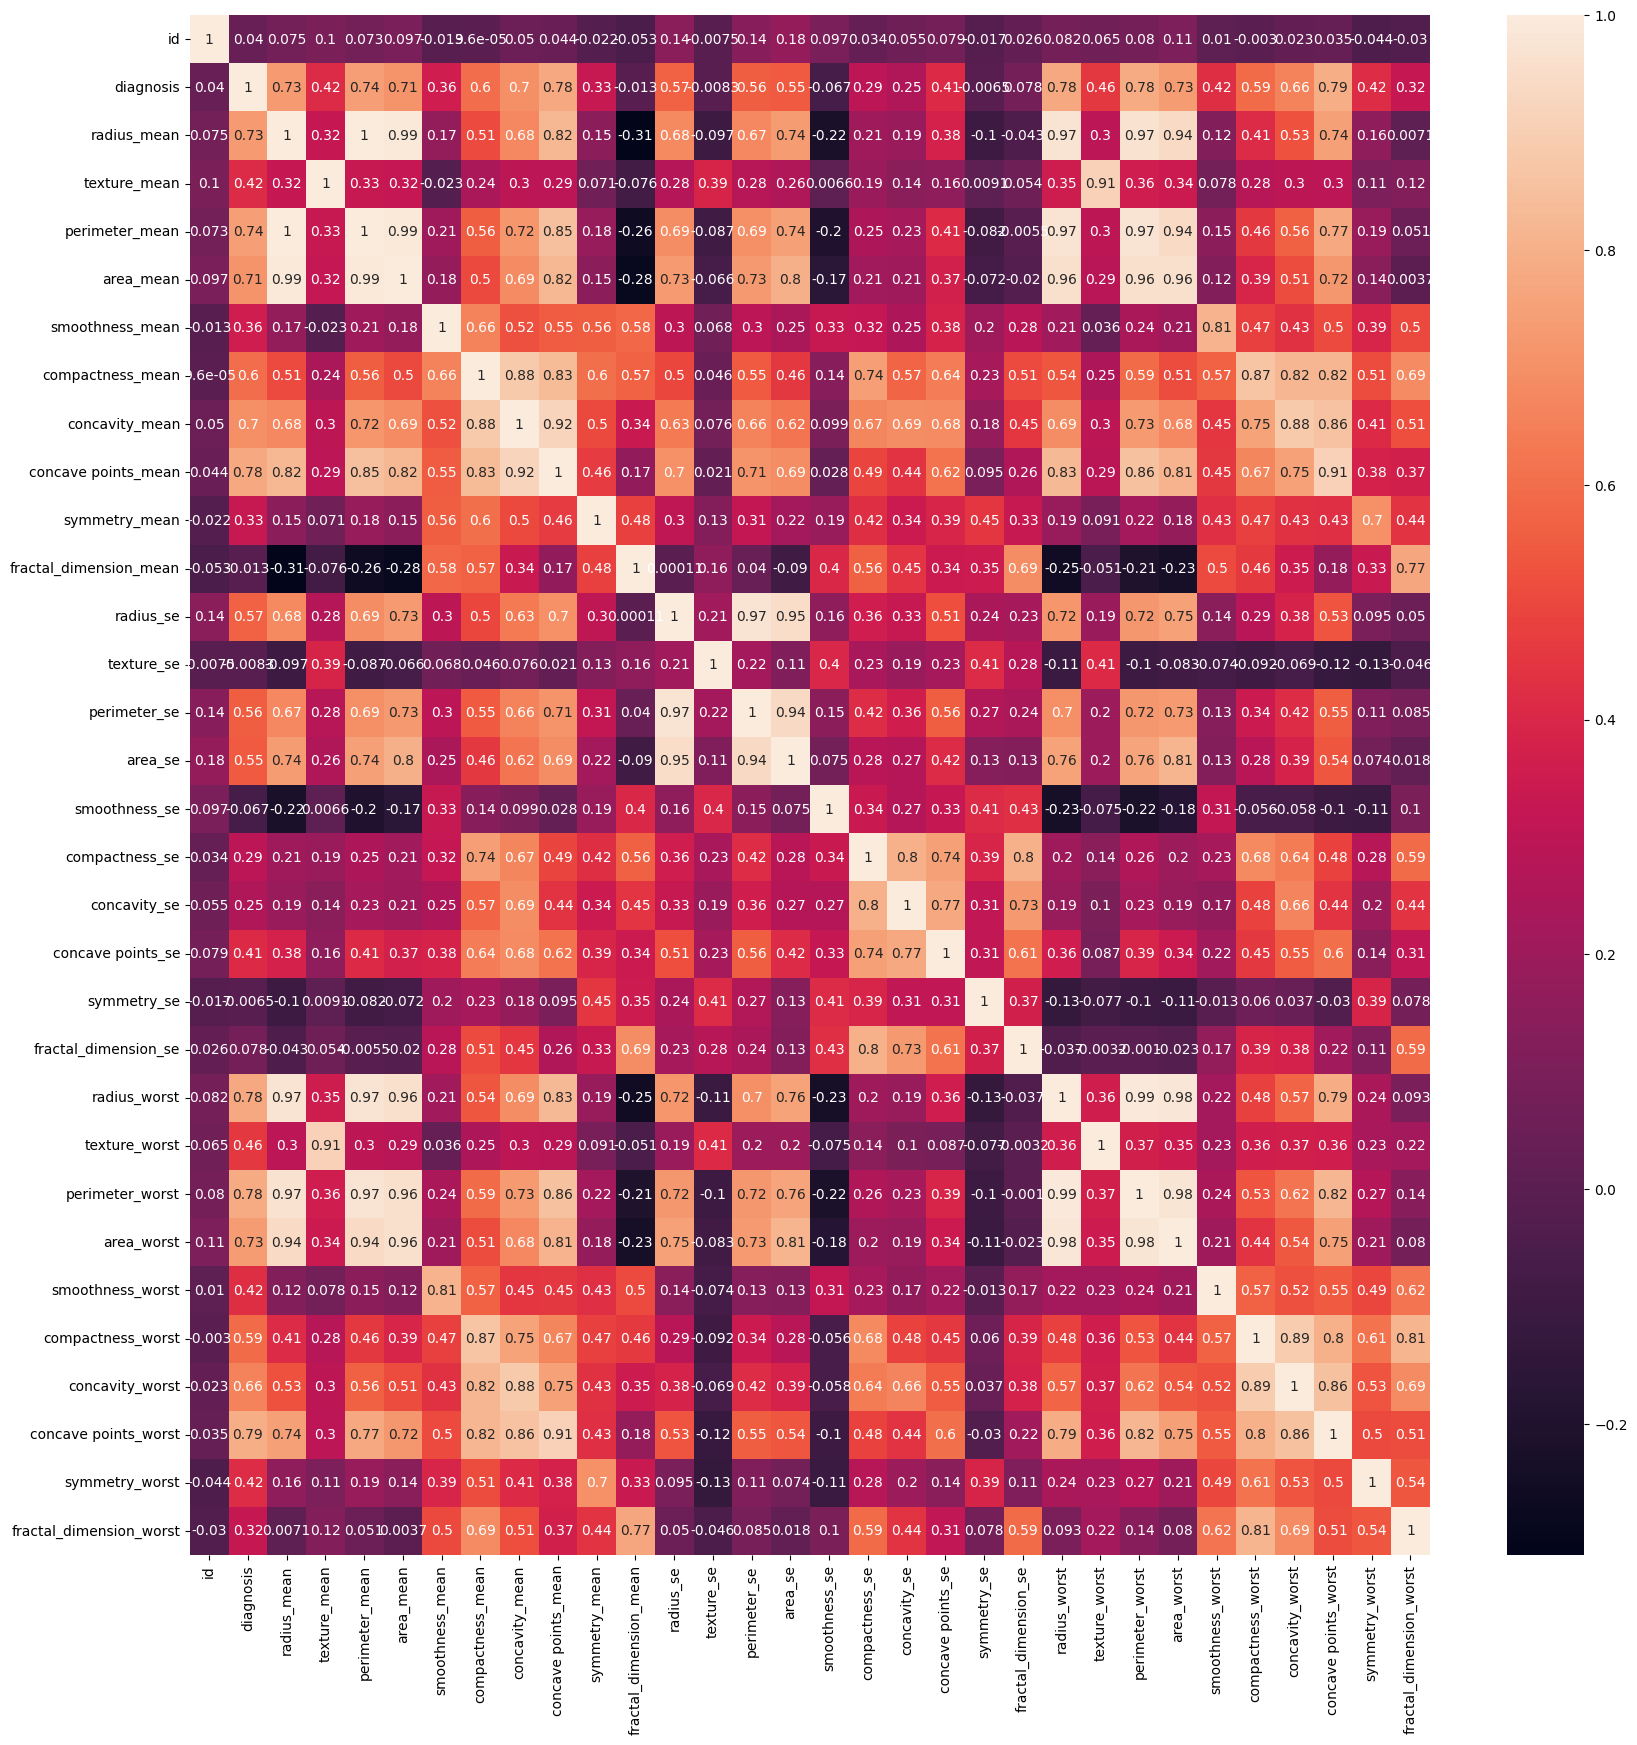

In [12]:
plt.figure(figsize = (20,20))
sns.heatmap(corr,annot=True)

In [13]:
data_features = data.drop(["id", "diagnosis"], axis = 1)
data_features.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

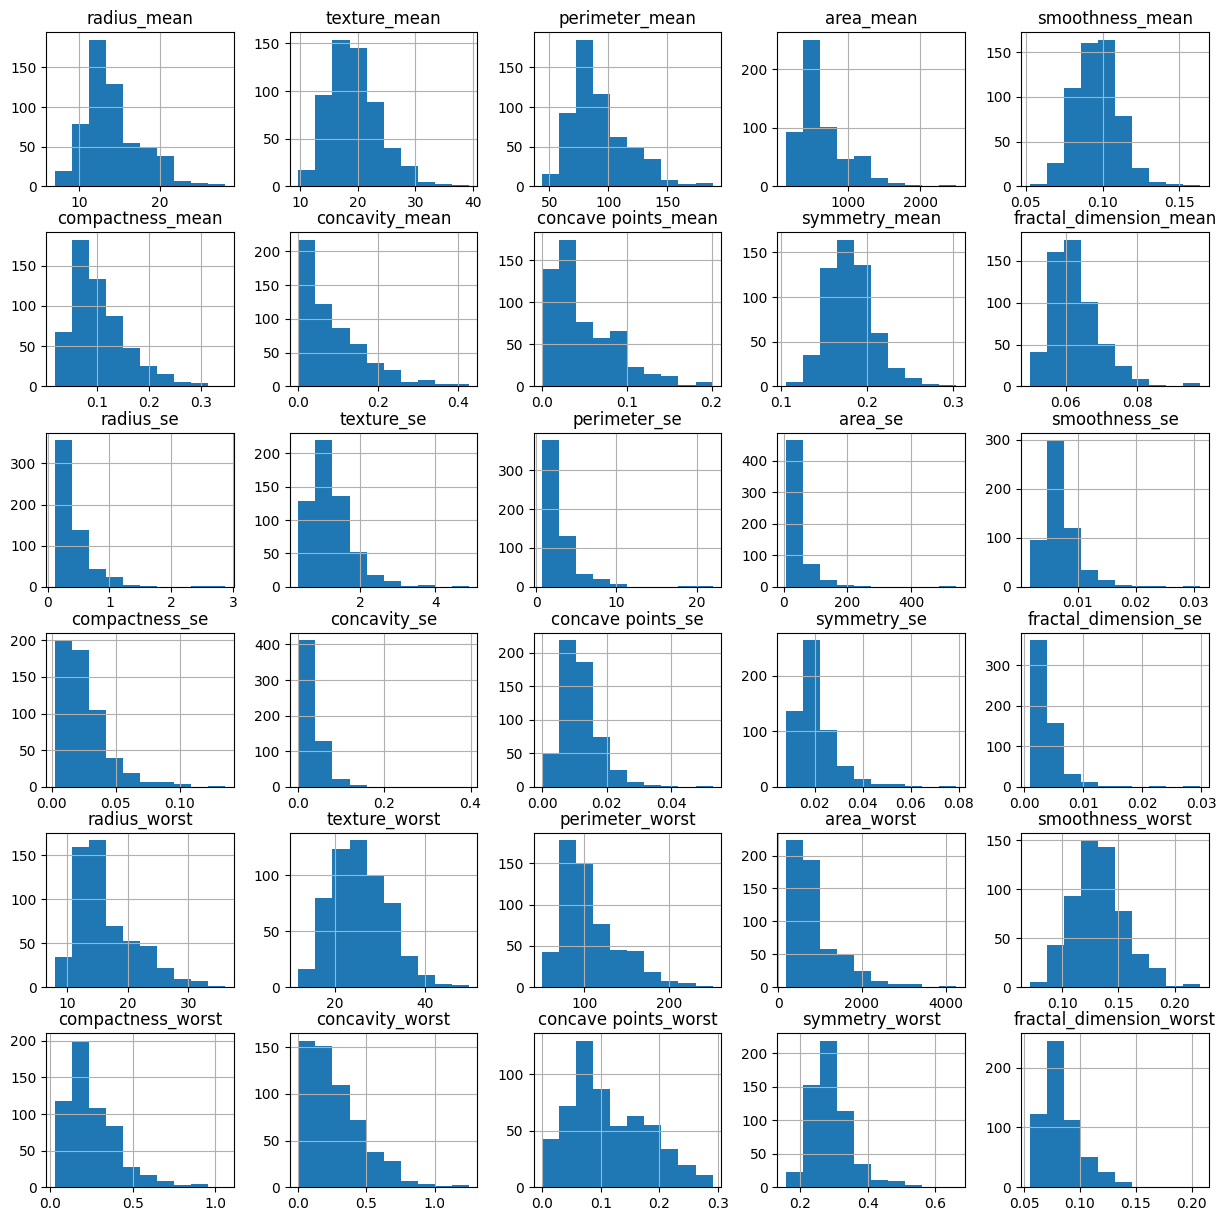

In [14]:
data_features.hist(figsize=(15,15))
plt.show()

In [15]:
data_final = data_features.drop(["texture_se", "smoothness_se","symmetry_se"], axis = 1)

data_final['diagnosis'] = data['diagnosis']

data_final.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'perimeter_se', 'area_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst',
       'diagnosis'],
      dtype='object')

In [16]:
def calculate_prior(data, Y):
  classes = sorted(list(data[Y].unique()))
  prior = []
  for i in classes:
      prior.append(len(data[data[Y]==i])/len(data))
  return prior

In [17]:
def calculate_likelihood_gaussian(data, feat_name, feat_val, Y, label):
  feat = list(data.columns)
  data = data[data[Y]==label]
  mean, std = data[feat_name].mean(), data[feat_name].std()
  p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
  return p_x_given_y

In [19]:
def naive_bayes_gaussian(data, X, Y):

  features = list(data.columns)[:-1]

  prior = calculate_prior(data, Y)

  Y_pred = []
  for x in X:
      labels = sorted(list(data[Y].unique()))
      likelihood = [1]*len(labels)
      for j in range(len(labels)):
          for i in range(len(features)):
              likelihood[j] *= calculate_likelihood_gaussian(data, features[i], x[i], Y, labels[j])

      post_prob = [1]*len(labels)
      for j in range(len(labels)):
          post_prob[j] = likelihood[j] * prior[j]

      Y_pred.append(np.argmax(post_prob))

  return np.array(Y_pred)

In [20]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data_final, test_size=0.2, random_state=41)

x_test = test.iloc[:,:-1].values
y_test = test.iloc[:,-1].values
y_pred = naive_bayes_gaussian(train, X=x_test, Y="diagnosis")

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [22]:
print(f"testing accuracy = {accuracy_score(y_test,y_pred)}")

testing accuracy = 0.9649122807017544


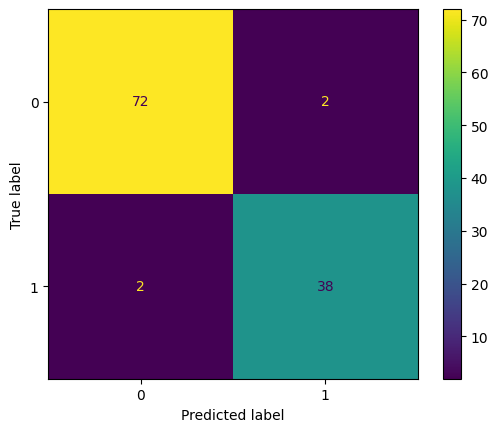

In [23]:
cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        74
           1       0.95      0.95      0.95        40

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [25]:
from matplotlib.colors import ListedColormap
import plotly.express as px
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA
from warnings import filterwarnings
filterwarnings('ignore')

In [27]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [29]:
#Data Wrangling:

#feature manipulation:
data=data.rename(columns={'diagnosis':'target'})

#encoding categorical data:
le=LabelEncoder()
data["target"]=le.fit_transform(data["target"])
data.head()

print(data.target.value_counts())

0    357
1    212
Name: target, dtype: int64


CORRELATION MATRIX

Text(0.5, 1.0, 'Correlation Between Features')

<Figure size 2000x1000 with 0 Axes>

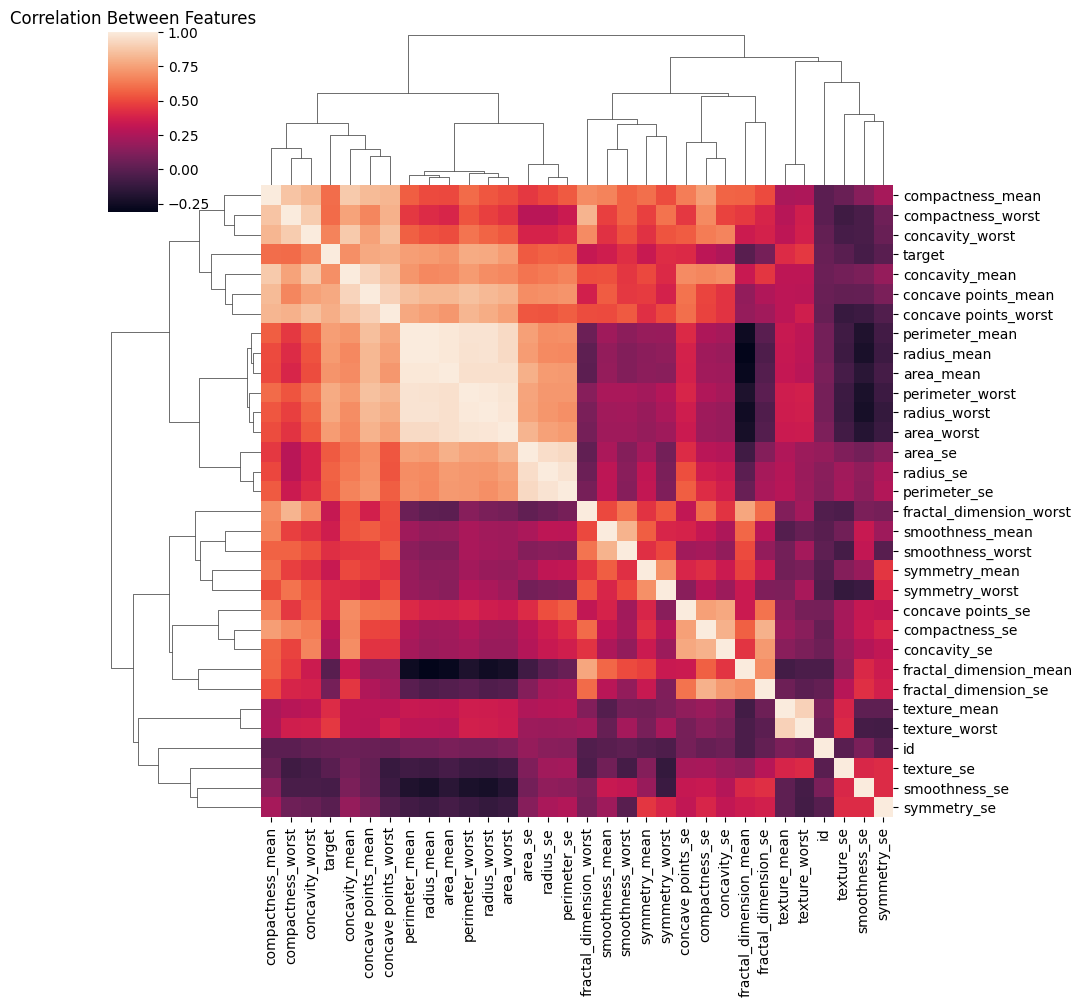

In [31]:
#Correlation Matrix:

corr=data.corr()
plt.figure(figsize=(20,10))
sns.clustermap(corr,fmt=".2f")
plt.title("Correlation Between Features")

CORRELATION BETWEEN FEATURES WITH CORR THRESHOLD 0.75

Text(0.5, 1.0, 'Correlation Between Features with Corr Threshold 0.75')

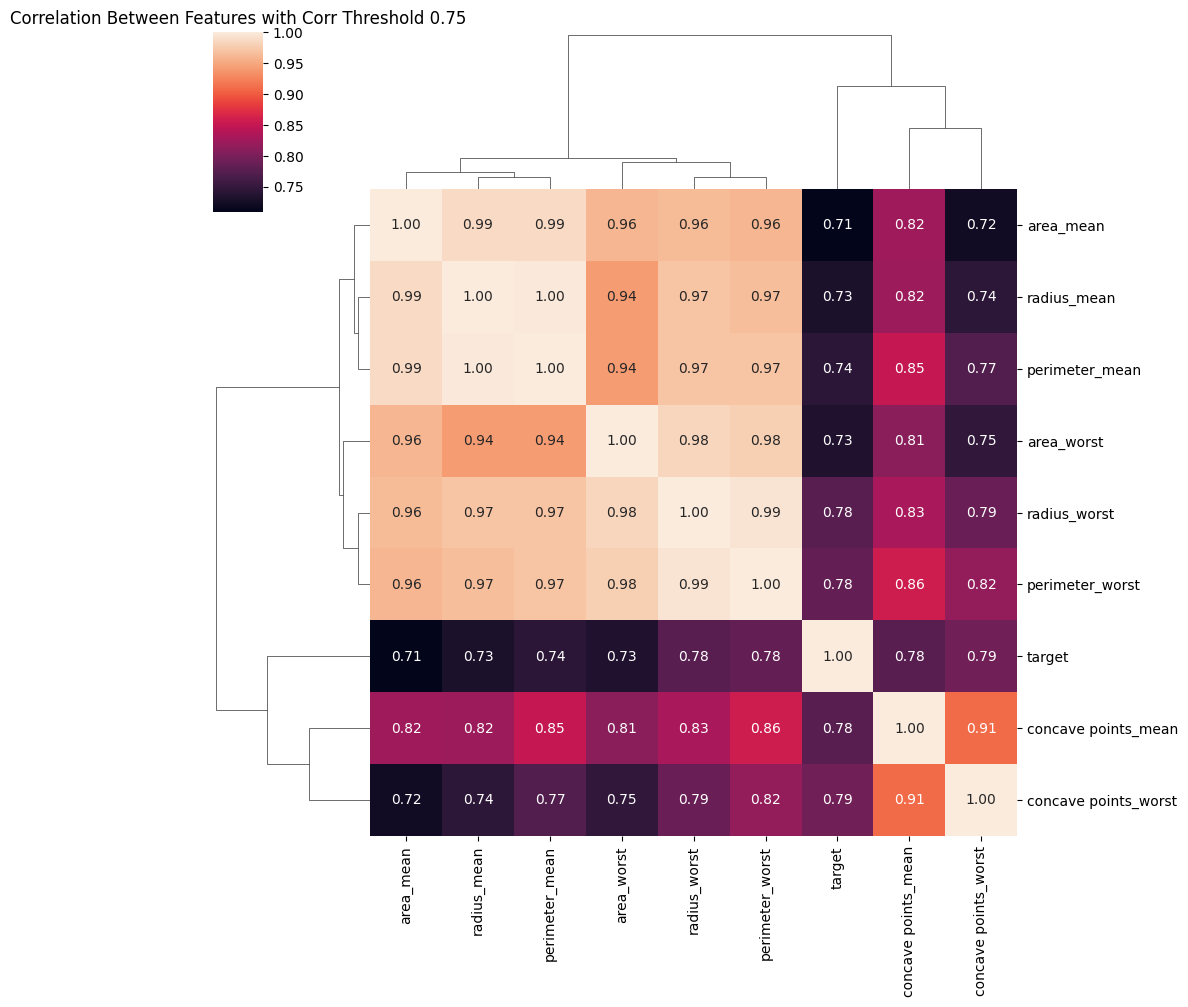

In [34]:
#Correlation Between Features with Corr Threshold 0.75
threshold=0.70
filter=np.abs(corr["target"])>threshold
corr_features=corr.columns[filtre].tolist()
sns.clustermap(data[corr_features].corr(),annot=True,fmt=".2f")
plt.title("Correlation Between Features with Corr Threshold 0.75")

PAIRPLOT

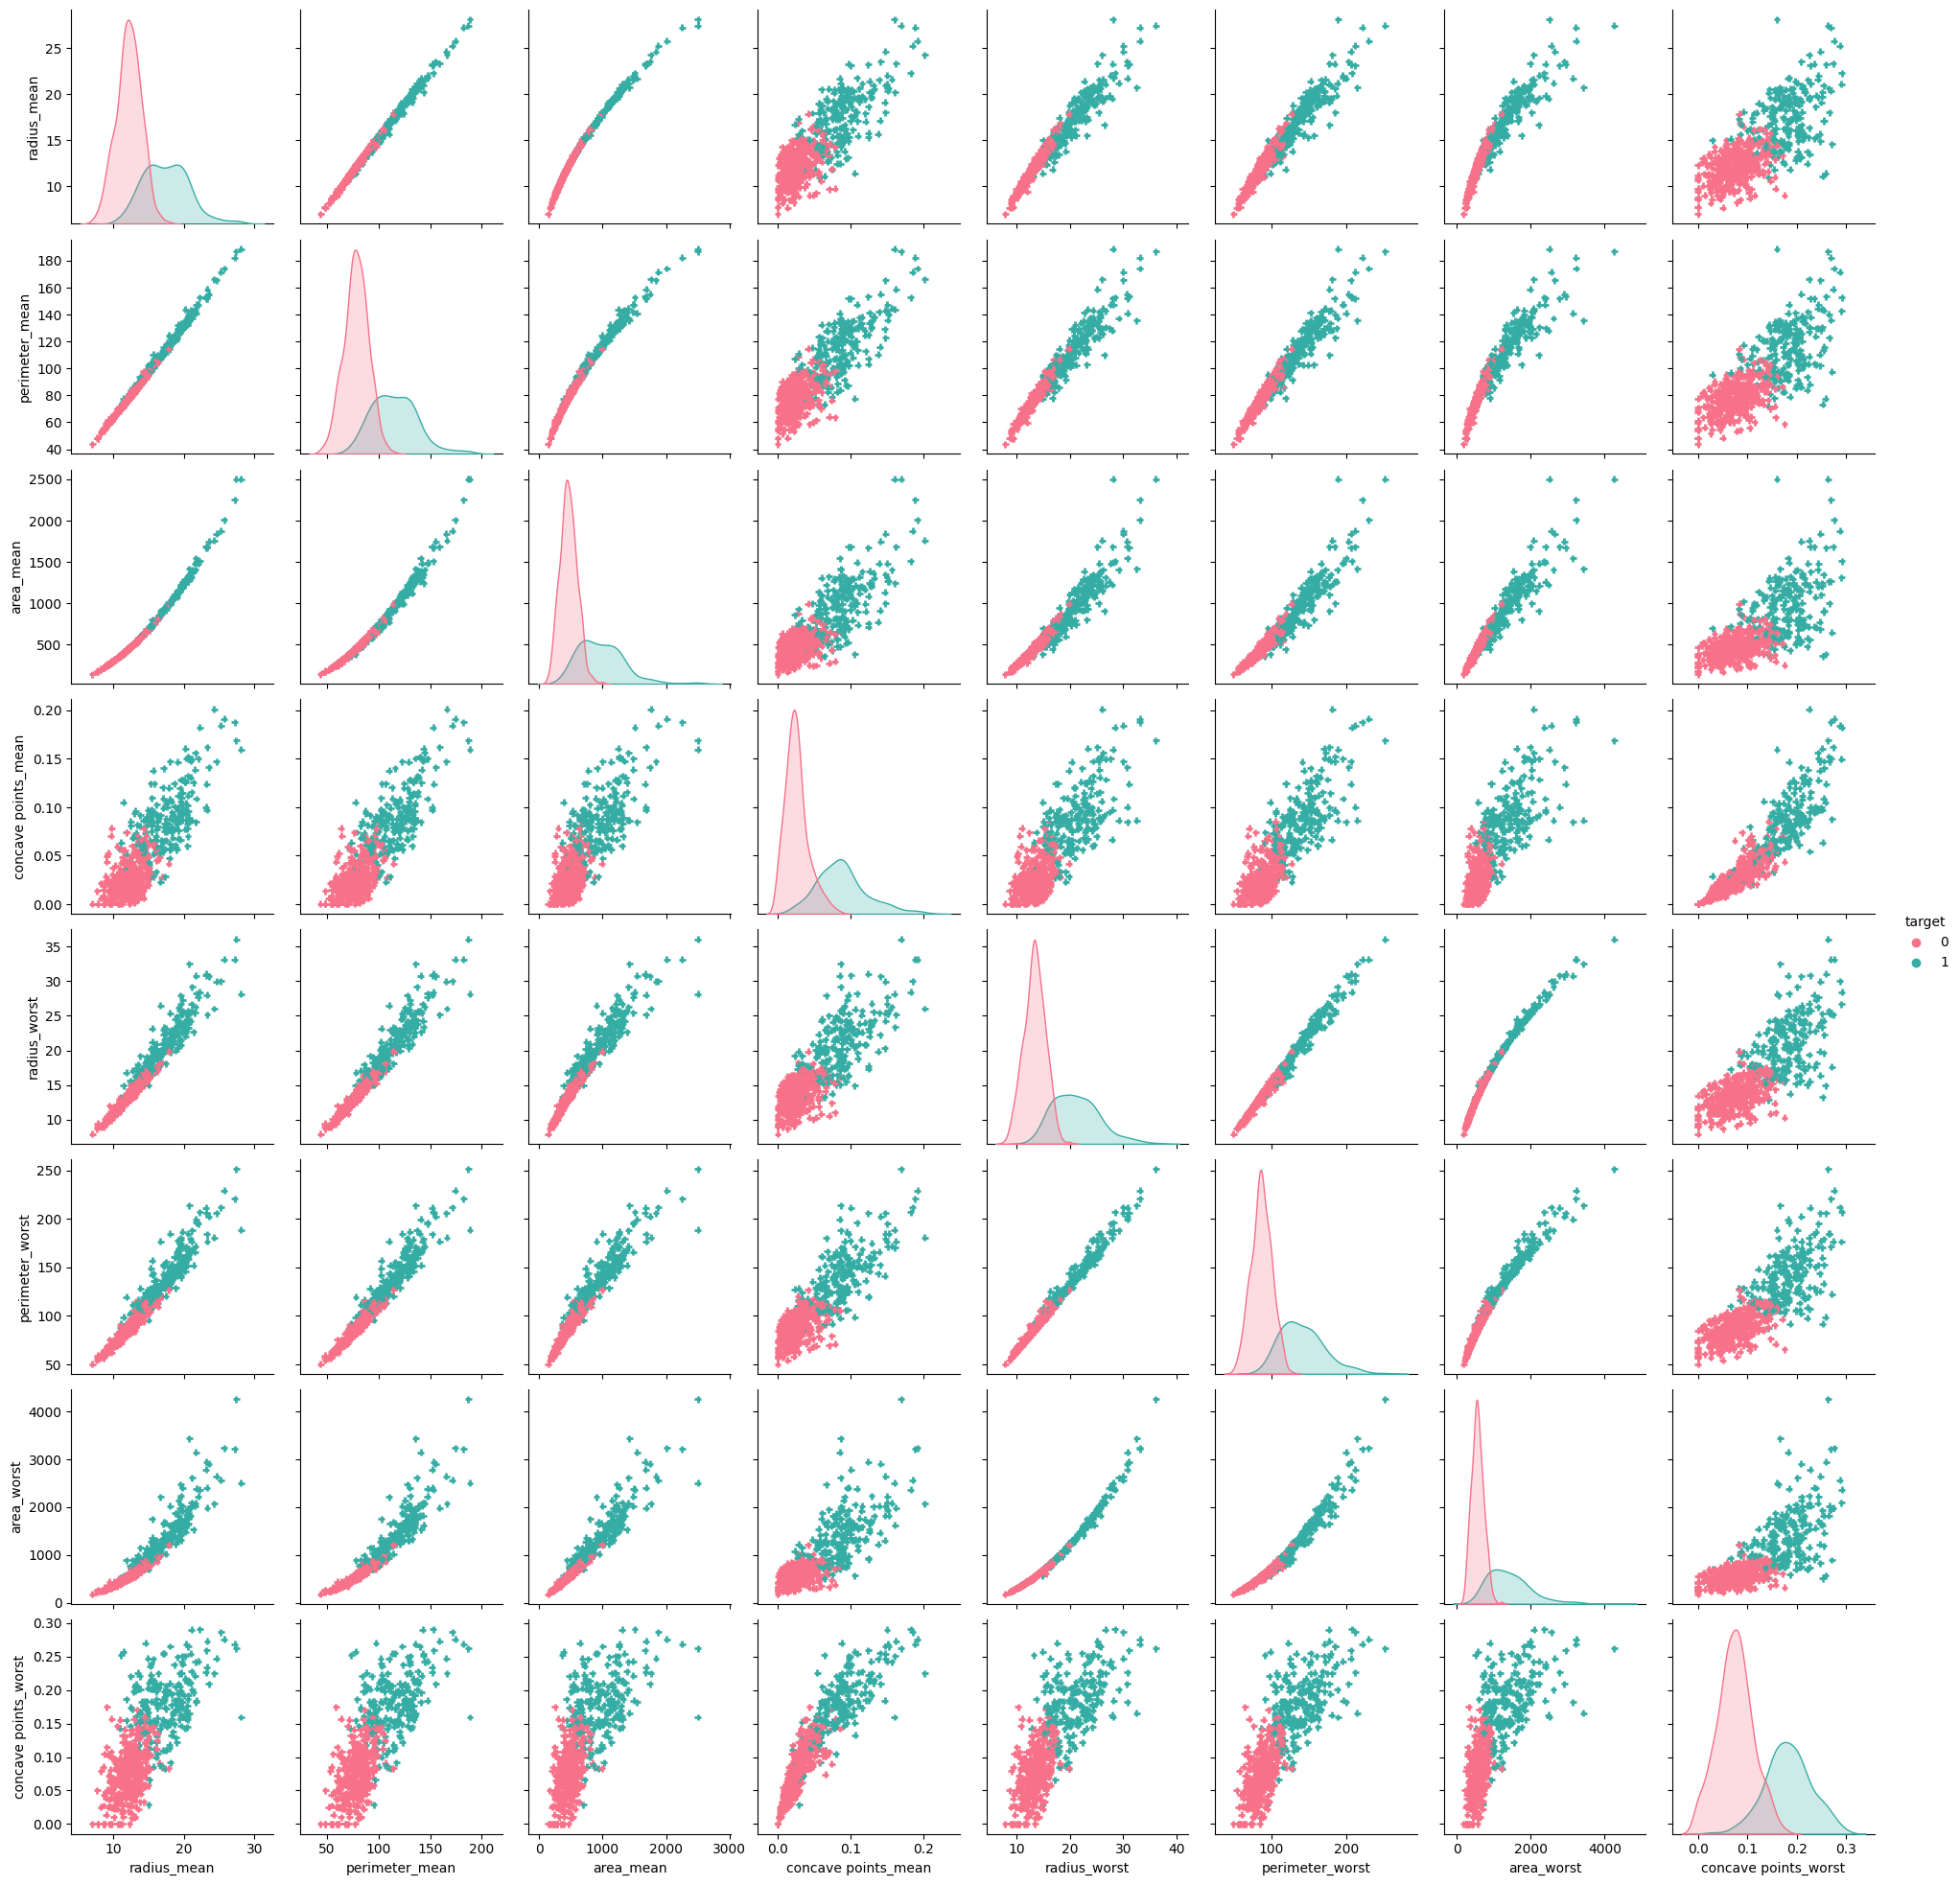

In [35]:
sns.pairplot(data[corr_features],diag_kind="kde",markers="+",hue="target",palette="husl",
             plot_kws=dict(s=25, edgecolor="b", linewidth=2))

OUTLIER DETECTION

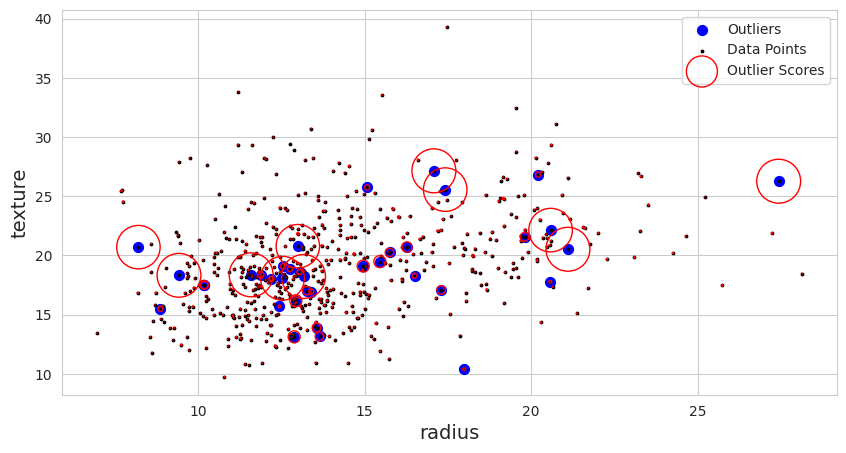

In [39]:
#Outlier Detection with Local Outlier Factor(LOF):

y=data.target
X=data.drop(["target"],axis=1)
columns=X.columns.tolist()


lcf=LocalOutlierFactor(n_neighbors=20,contamination=0.1)

y_pred=lcf.fit_predict(X)
y_pred[0:10] # -1: outlier, 1: inlier

X_score=lcf.negative_outlier_factor_ #outlier scores

outlier_score=pd.DataFrame()
outlier_score["score"]=X_score

threshold=-2
filter=outlier_score["score"]<threshold # the outliers whose scores are less than the threshold value

outlier_index=outlier_score[filtre].index.tolist() #index of the outliers


#visualization of the outliers:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.scatter(X.iloc[outlier_index,1],X.iloc[outlier_index,2],color="blue",s=50,label="Outliers")
plt.scatter(X.iloc[:,1],X.iloc[:,2],color="k",s=3,label="Data Points")

radius=(X_score.max()-X_score)/(X_score.max()-X_score.min()) #radius of the outliers
outlier_score["radius"]=radius
plt.scatter(X.iloc[:,1],X.iloc[:,2],s=1000*radius,edgecolors="r",facecolors="none",label="Outlier Scores")
plt.xlabel("radius",fontsize=14)
plt.ylabel("texture",fontsize=14)
plt.legend()
plt.show()

#drop outliers:
X=X.drop(outlier_index)
y=y.drop(outlier_index).values

TRAIN TEST SPLIT

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

STANDARDIZATION

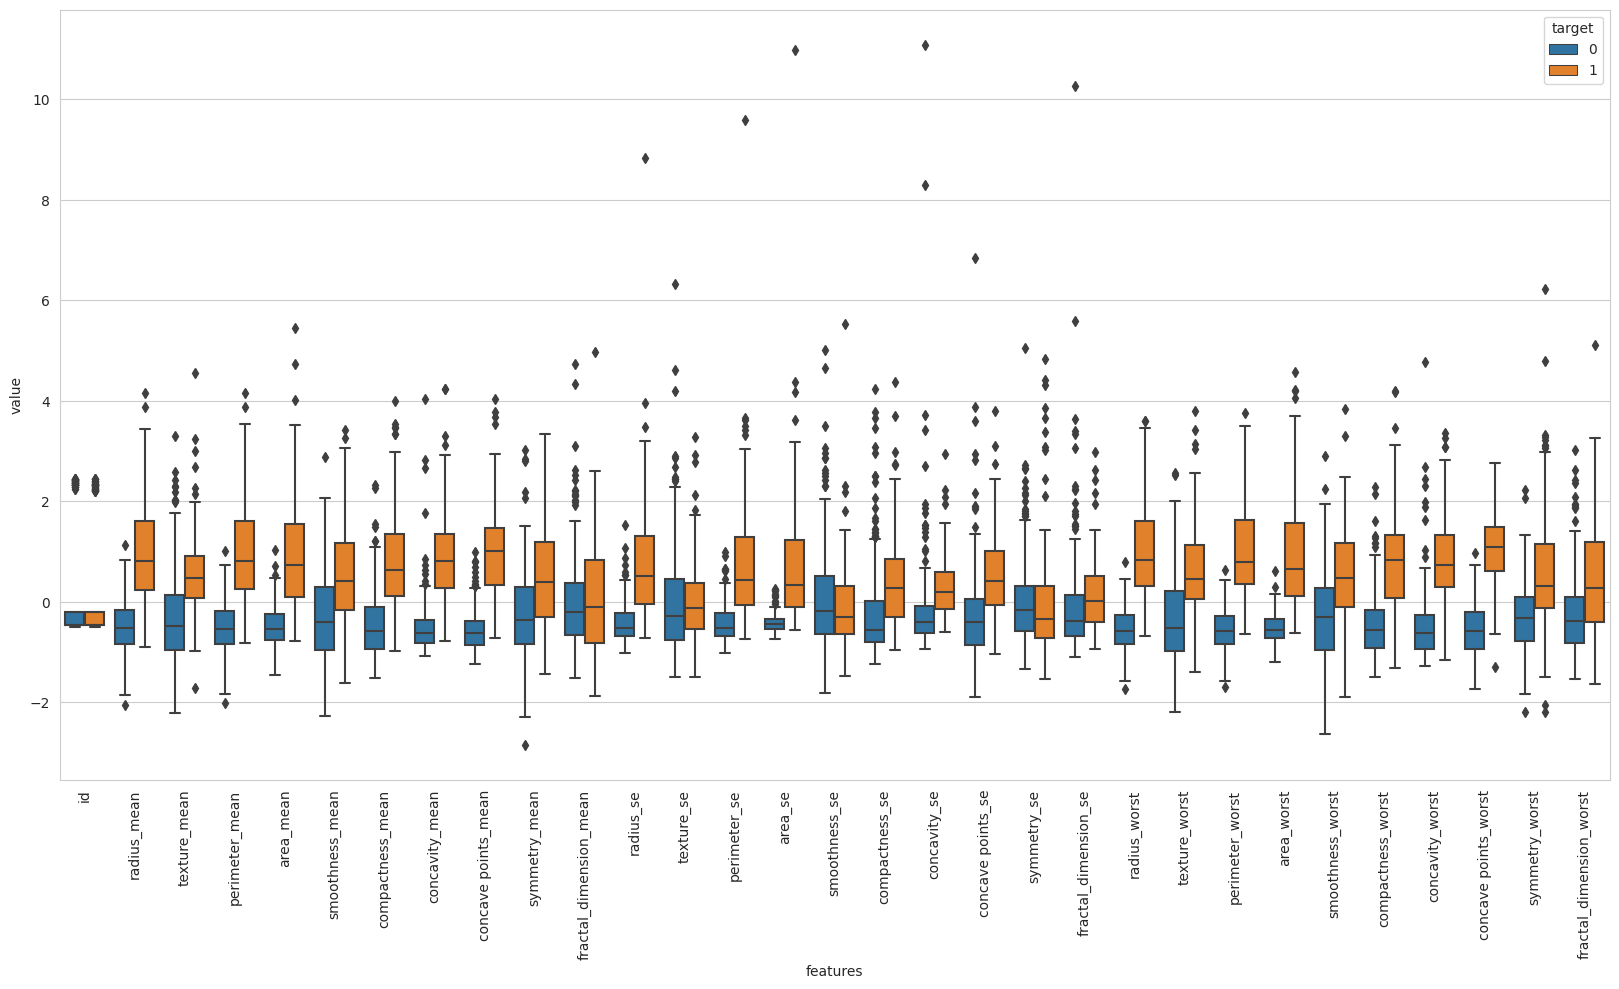

In [41]:
sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# converting array train set to dataframe
X_train_df=pd.DataFrame(X_train,columns=columns)

#visualization of standardized data:
X_train_df["target"]=y_train
data_melted=pd.melt(X_train_df,id_vars="target",
                    var_name="features",
                    value_name="value")

plt.figure(figsize=(20,10))
sns.boxplot(x="features",y="value",hue="target",data=data_melted)
plt.xticks(rotation=90)
plt.show()

KNN CLASSIFICATION

In [43]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)

print("accuracy score:",accuracy_score(y_test,y_pred))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred))

px.imshow(confusion_matrix(y_test,y_pred),color_continuous_scale="Blues")

accuracy score: 0.9625
confusion matrix:
 [[96  1]
 [ 5 58]]


MODEL TUNING

In [44]:
def KNN_Best_Params(X_train,X_test,y_train,y_test):

    k_range=list(range(1,31))
    weight_options=["uniform","distance"]
    param_grid=dict(n_neighbors=k_range,weights=weight_options)

    knn=KNeighborsClassifier()
    grid=GridSearchCV(knn,param_grid,cv=10,scoring="accuracy",n_jobs=-1,verbose=2)
    grid.fit(X_train,y_train)

    print("Best training score:{} with parameters:{}".format(grid.best_score_,grid.best_params_))

    knn=KNeighborsClassifier(**grid.best_params_) # building the model with the best parameters
    knn.fit(X_train,y_train)

    # checking overfitting:
    y_pred_test=knn.predict(X_test)
    y_pred_train=knn.predict(X_train)

    cm_test=confusion_matrix(y_test,y_pred_test)
    cm_train=confusion_matrix(y_train,y_pred_train)

    acc_test=accuracy_score(y_test,y_pred_test)
    acc_train=accuracy_score(y_train,y_pred_train)

    print("Test Score:{} Train Score:{}".format(acc_test,acc_train))
    print("CM Test:\n",cm_test)
    print("CM Train:\n",cm_train)

    return grid


grid=KNN_Best_Params(X_train,X_test,y_train,y_test)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best training score:0.9730440967283073 with parameters:{'n_neighbors': 7, 'weights': 'uniform'}
Test Score:0.95625 Train Score:0.9758064516129032
CM Test:
 [[95  2]
 [ 5 58]]
CM Train:
 [[237   1]
 [  8 126]]


DIMENSION REDUCTION WITH PCA : PRINCIPAL COMPONENT ANALYSIS

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

<Axes: xlabel='p1', ylabel='p2'>

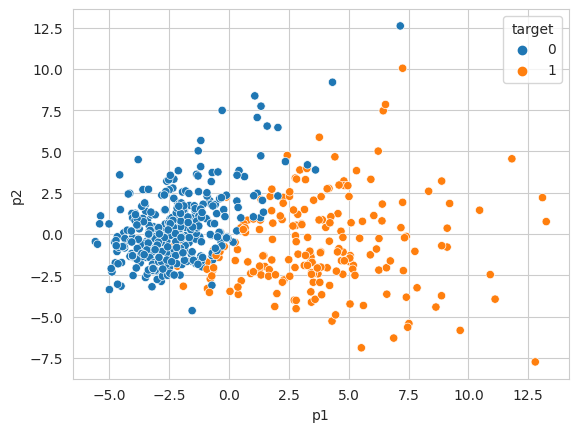

In [46]:
sc=StandardScaler()
X_scaled=sc.fit_transform(X)

pca=PCA(n_components=2)
X_reduced=pca.fit_transform(X_scaled)

pca_data=pd.DataFrame(X_reduced,columns=["p1","p2"])
pca_data["target"]=y
sns.scatterplot(x="p1",y="p2",hue="target",data=pca_data)

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X_reduced,y,test_size=0.3,random_state=42)

grid=KNN_Best_Params(X_train,X_test,y_train,y_test)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best training score:0.946230440967283 with parameters:{'n_neighbors': 7, 'weights': 'uniform'}
Test Score:0.95 Train Score:0.9516129032258065
CM Test:
 [[92  5]
 [ 3 60]]
CM Train:
 [[229   9]
 [  9 125]]


NCA - NEIGHBORHOOD COMPONENT ANALYSIS

On reducing the dimensions to overtake the overfitting problem, we observe that the accuracy score has also decreased. Hence we will use the NCA method to increase the accuracy score.

Text(0.5, 1.0, 'NCA:Neighbourhood Component Analysis')

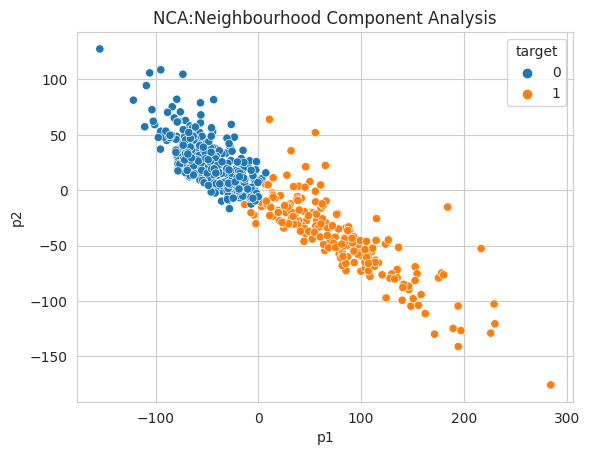

In [49]:
sc=StandardScaler()
X_scaled=sc.fit_transform(X)

nca=NeighborhoodComponentsAnalysis(n_components=2,random_state=42)
nca.fit(X_scaled,y)
X_reduced_nca=nca.transform(X_scaled)

nca_data=pd.DataFrame(X_reduced_nca,columns=["p1","p2"])
nca_data["target"]=y

sns.scatterplot(x="p1",y="p2",hue="target",data=nca_data)
plt.title("NCA:Neighbourhood Component Analysis")

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X_reduced_nca,y,test_size=0.3,random_state=42)
grid_nca=KNN_Best_Params(X_train,X_test,y_train,y_test)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best training score:0.9946657183499289 with parameters:{'n_neighbors': 1, 'weights': 'uniform'}
Test Score:0.9875 Train Score:1.0
CM Test:
 [[97  0]
 [ 2 61]]
CM Train:
 [[238   0]
 [  0 134]]


On increasing the accuracy score with NCA method, the model is now ready to predict the new data.

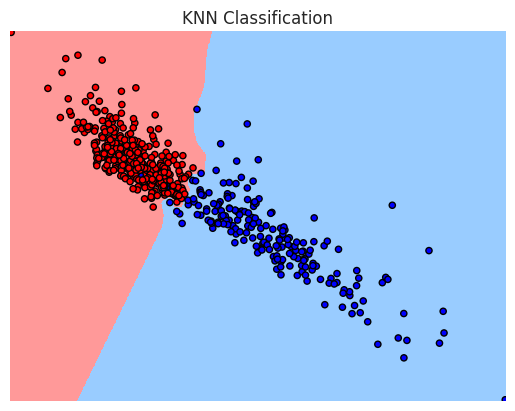

In [55]:
cmap_light = ListedColormap(["#FF9999", "#99CCFF"])
cmap_bold = ListedColormap(["#FF0000", "#0000FF"])

h = 0.5
X = X_reduced_nca

X_min, X_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(X_min, X_max, h), np.arange(y_min, y_max, h))

Z = grid_nca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor="k", s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN Classification")

# Remove x-axis and y-axis ticks
plt.xticks([])
plt.yticks([])

# Remove the box around the plot
plt.box(False)

# Remove the frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()
